In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from model import MLP

In [11]:
def train():
    transform = transforms.ToTensor()
    train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
    train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

    model = MLP()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    for epoch in range(20):
        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
        print(f'epoch {epoch+1} complete')


    torch.save(model.state_dict(), "mnist_mlp.pt")
    print("model saved as mnist_mlp.pt")



# train model
if __name__ == '__main__':
    train()

epoch 1 complete
epoch 2 complete
epoch 3 complete
epoch 4 complete
epoch 5 complete
epoch 6 complete
epoch 7 complete
epoch 8 complete
epoch 9 complete
epoch 10 complete
epoch 11 complete
epoch 12 complete
epoch 13 complete
epoch 14 complete
epoch 15 complete
epoch 16 complete
epoch 17 complete
epoch 18 complete
epoch 19 complete
epoch 20 complete
model saved as mnist_mlp.pt


net.1.weight: torch.Size([128, 784])
net.1.bias: torch.Size([128])
net.3.weight: torch.Size([10, 128])
net.3.bias: torch.Size([10])


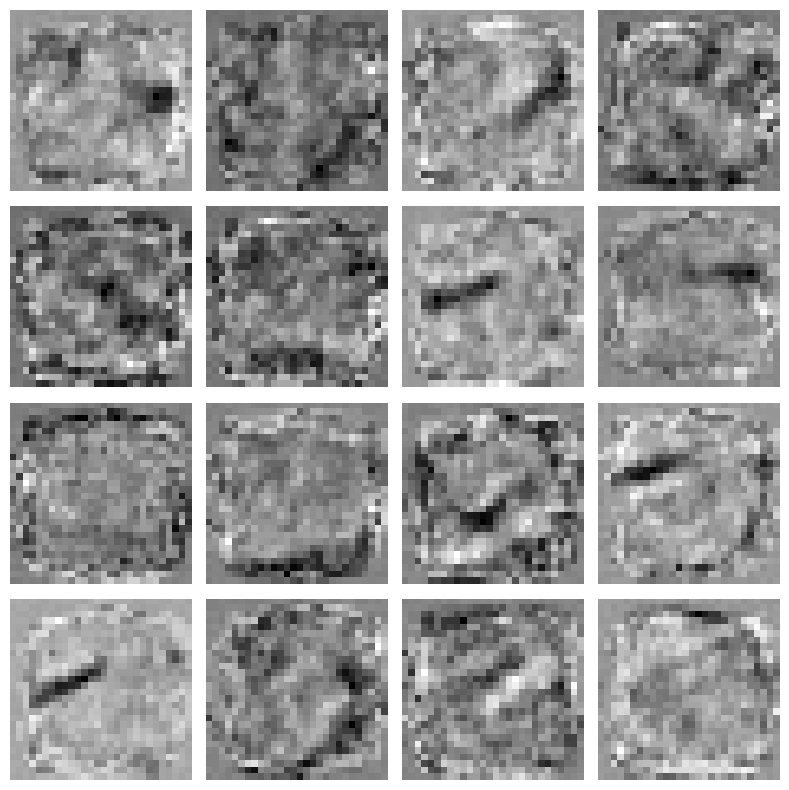

In [12]:
import matplotlib.pyplot as plt


# Load model
model = MLP()
model.load_state_dict(torch.load("mnist_mlp.pt"))
model.eval()

# Print state_dict keys and shapes
for name, param in model.state_dict().items():
    print(f"{name}: {param.shape}")

# Visualize first 16 neurons of first layer
weights = model.state_dict()['net.1.weight']
import numpy as np
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(weights[i].reshape(28, 28).detach().numpy(), cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

<Axes: ylabel='Count'>

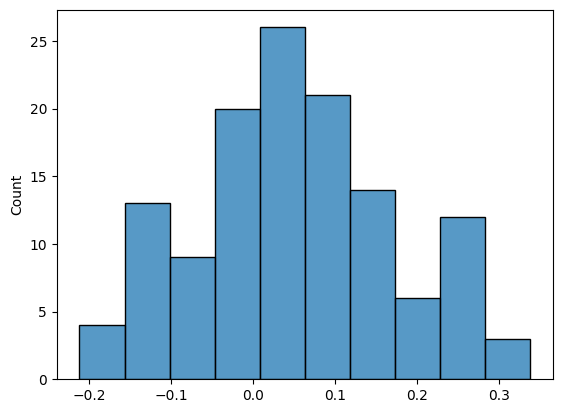

In [13]:
import seaborn as sns
sns.histplot(model.state_dict()['net.1.bias'].numpy())


Parameter: net.1.weight, Shape: (128, 784)


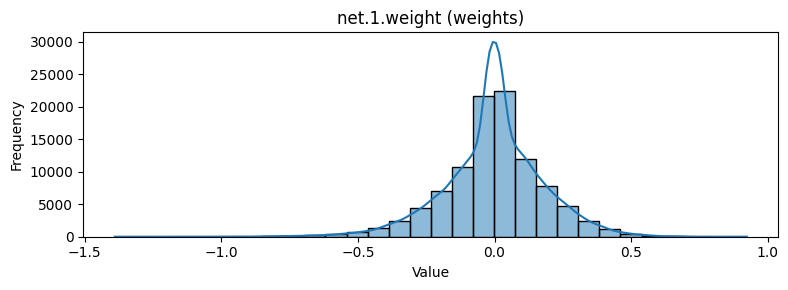

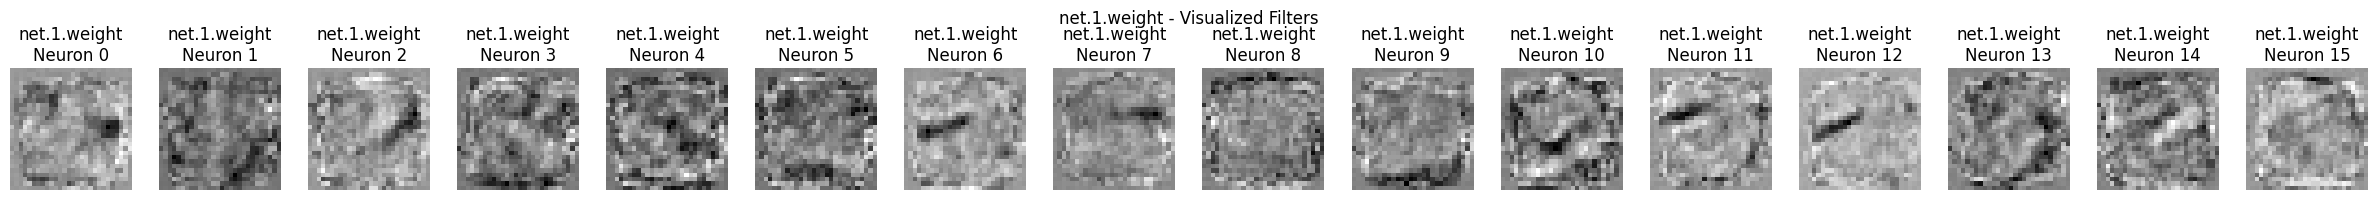


Parameter: net.1.bias, Shape: (128,)


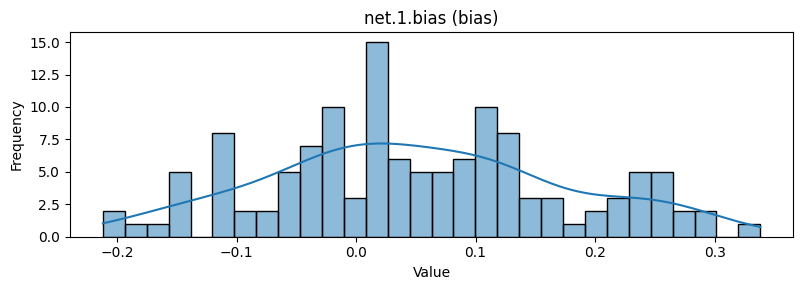


Parameter: net.3.weight, Shape: (10, 128)


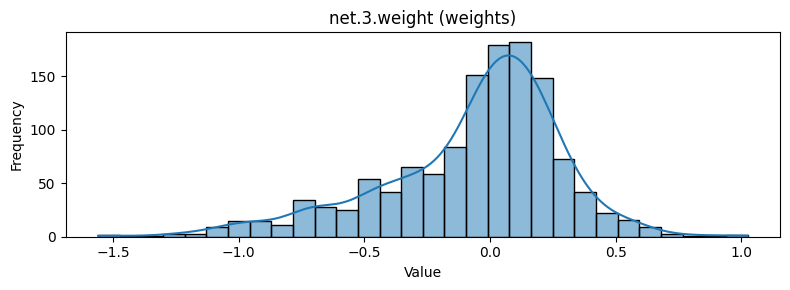


Parameter: net.3.bias, Shape: (10,)


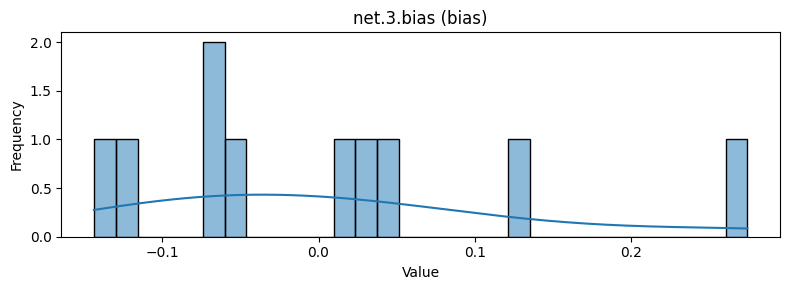

In [16]:
# Assuming model is already loaded
state_dict = model.state_dict()

for name, param in state_dict.items():
    values = param.cpu().numpy()
    print(f"\nParameter: {name}, Shape: {values.shape}")

    if values.ndim == 1:
        # Bias vector → histogram
        plt.figure(figsize=(8, 3))
        sns.histplot(values, bins=30, kde=True)
        plt.title(f"{name} (bias)")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

    elif values.ndim == 2:
        # Weight matrix → histogram
        plt.figure(figsize=(8, 3))
        sns.histplot(values.flatten(), bins=30, kde=True)
        plt.title(f"{name} (weights)")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

        # Special case: visualize if shape = [N, 784] (assume MNIST)
        if values.shape[1] == 784:
            n = min(16, values.shape[0])  # visualize up to 16 filters
            fig, axes = plt.subplots(1, n, figsize=(n * 1.5, 2))
            for i in range(n):
                ax = axes[i]
                ax.imshow(values[i].reshape(28, 28), cmap='gray')
                ax.axis('off')
                ax.set_title(f"{name}\nNeuron {i}")
            plt.suptitle(f"{name} - Visualized Filters")
            plt.tight_layout()
            plt.show()